# ***Plusvalía estimada***

In [1]:
# Manejo de datos
import os # Directorios
import pandas as pd # Manipulación df
import numpy as np
# Gráficas
import plotly.graph_objects as go #Para obtener librería usar: pip install plotly
from plotly.subplots import make_subplots
import plotly.io as pio # Exportar gráfica

In [2]:
# Obtener el directorio actual de trabajo
directorio_actual = os.getcwd()
# Directorio donde se encuentran los archivos JSON (ruta relativa)
directorio_json = os.path.join(directorio_actual, 'datos_json')
#print("Directorio JSON relativo:", directorio_json)
# Obtener la lista de archivos JSON en el directorio
archivos_json = os.listdir(directorio_json)

In [3]:
dataframes = {}
# Iterar sobre cada archivo JSON y crear un DataFrame
for archivo in archivos_json:
    # Obtener el nombre de la tabla del nombre del archivo
    nombre_tabla = archivo.replace('datos_', '').replace('.json', '')    
    # Cargar el archivo JSON en un DataFrame y asignarlo a una variable con un nombre dinámico
    ruta_json = os.path.join(directorio_json, archivo)
    globals()[f"df_{nombre_tabla}"] = pd.read_json(ruta_json)

In [4]:
# Obtener todos los nombres de las variables globales
nombres_variables_globales = list(globals().keys())
# Filtrar los nombres, solo aquellos que comienzan con "df_"
nombres_df = [nombre for nombre in nombres_variables_globales if nombre.startswith("df_")]

# Lista de nombres de los DataFrames creados
print("Lista de DataFrames creados:")
print(nombres_df)

Lista de DataFrames creados:
['df_alfa_q_feb_2023_pachuca', 'df_alfa_q_jul_2023_pachuca', 'df_alfa_q_jun_2023_pachuca', 'df_alfa_q_mar_2023_pachuca', 'df_alfa_q_nov_2022_pachuca', 'df_alfa_q_oct_2022_pachuca', 'df_alfa_q_sep_2023_pachuca', 'df_enero_2024_querertaro', 'df_financiamientos_2019_pachuca', 'df_financiamientos_2020_pachuca', 'df_financiamientos_2021_pachuca', 'df_financiamientos_2022_pachuca', 'df_financiamientos_2023_pachuca', 'df_grupos_edad_pachuca', 'df_grupos_edad_queretaro', 'df_junio_2023_queretaro', 'df_publicacion_pachuca', 'df_salarios_pachuca', 'df_usuarios']


In [5]:
df_alfa_q_oct_2022_pachuca.columns

Index(['id', 'q', 'categoria', 'ids', 'propiedad', 'precio', 'm2_total',
       'm2_contruido', 'precio_m2_contruido', 'precio_m2_terreno',
       'publicado_hace', 'personas_interesadas', 'status', 'tipo',
       'estacionamiento', 'recamaras', 'baño', 'medio_baño', 'baño_total',
       'cantidad_pisos', 'antiguedad', 'seguridad_privada', 'fraccionamiento',
       'colonia', 'cp', 'url'],
      dtype='object')

In [7]:
df_financiamientos_2020_pachuca.columns

Index(['id', 'año', 'mes', 'cve_ent', 'entidad', 'cve_municipio', 'municipio',
       'organismo', 'modalidad', 'destino', 'tipo', 'sexo', 'edad_rango',
       'ingresos_rango', 'vivienda_valor', 'acciones', 'monto'],
      dtype='object')

In [8]:
df_financiamientos_2020_pachuca

,id,año,mes,cve_ent,entidad,cve_municipio,municipio,organismo,modalidad,destino,tipo,sexo,edad_rango,ingresos_rango,vivienda_valor,acciones,monto
0,1,2020,1,13,Hidalgo,48,Pachuca de Soto,2,2,1,2,2,1,1,1,1,10286.00
1,2,2020,1,13,Hidalgo,48,Pachuca de Soto,2,2,1,2,1,1,1,1,1,16471.00
2,3,2020,1,13,Hidalgo,48,Pachuca de Soto,2,2,1,2,1,2,1,1,1,25171.00
3,4,2020,1,13,Hidalgo,48,Pachuca de Soto,2,2,1,1,2,2,2,1,1,29856.00
4,5,2020,1,13,Hidalgo,48,Pachuca de Soto,2,2,1,1,2,2,5,1,1,46811.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1174,2020,12,13,Hidalgo,48,Pachuca de Soto,1,1,2,1,1,2,6,4,4,6099374.96
1174,1175,2020,12,13,Hidalgo,48,Pachuca de Soto,2,1,2,1,1,3,6,6,1,6584000.00
1175,1176,2020,12,13,Hidalgo,48,Pachuca de Soto,2,1,2,1,1,2,6,5,4,8904106.00
1176,1177,2020,12,13,Hidalgo,48,Pachuca de Soto,2,1,2,1,2,2,6,5,7,13390156.00


___
# **Mediante datos directos**
## *Plusvalía estimada*

In [5]:
datos_directos = {
    'año': [2022, 2023, 2024, 2025, 2026],
    'promedio': [2589333.1, 3534894.07, 3984402.09, 4491070.92, 5062169.32]
}
# Crear DataFrame
direct_data = pd.DataFrame(datos_directos)
direct_data

,año,promedio
0,2022,2589333.10
1,2023,3534894.07
2,2024,3984402.09
3,2025,4491070.92
4,2026,5062169.32


In [7]:
# Datos
año = direct_data['año']
promedio = direct_data['promedio']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=año,
    y=promedio,
    mode='markers+lines',
    marker=dict(color='blue'),
))
# Agregar anotaciones para mostrar los valores encima de los puntos
for a, p in zip(año, promedio):
    fig.add_annotation(
        x=a,
        y=p,
        text=f"${p:,.2f}",  # Formatear el valor del promedio como moneda
        showarrow=False,
        font=dict(color='black', size=12),
        xshift=0,
        yshift=17,
        textangle=0
    )
# Actualizar diseño
fig.update_layout(
    title='Plusvalía estimada',
    yaxis=dict(
        range=[0, 6000000],  # Establecer el rango del eje y
        tickvals=[2000000, 4000000, 6000000],  # Definir los valores de las marcas en el eje y
        ticktext=['$2,000,000', '$4,000,000', '$6,000,000'],  # Definir el texto de las marcas en el eje y
        gridcolor='#dddcda',  # Color de las líneas de la cuadrícula
        gridwidth=1  # Ancho de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='#dddcda', 
        tickmode='array',
        tickvals=año,
        ticktext=año
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
# Exportar gráfica como archivo HTML
def guardar_grafico_como_html(fig, nombre_archivo, carpeta='graficas'):
    # Crear la carpeta si no existe
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    
    # Gráfica como archivo HTML en la carpeta especificada
    pio.write_html(fig, f'{carpeta}/{nombre_archivo}.html')

guardar_grafico_como_html(fig, 'g_scatt_plusvaliaestimada_direct_pachuca', carpeta='graficas')
fig.show()


## *Plusvalía estimada, porcentual*

In [8]:
datos_directos = {
    'año': [2023, 2024, 2025, 2026],
    'promedio': [36.5, 49.2, 61.9, 74.6]
}
# Crear DataFrame
direct_data_por = pd.DataFrame(datos_directos)
direct_data_por

,año,promedio
0,2023,36.5
1,2024,49.2
2,2025,61.9
3,2026,74.6


In [15]:
# Datos
año = direct_data_por['año']
promedio = direct_data_por['promedio']

# Crear figura
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=año,
    y=promedio,
    mode='markers+lines',
    marker=dict(color='blue'),
))

# Agregar anotaciones para mostrar los valores encima de los puntos
for a, p in zip(año, promedio):
    fig.add_annotation(
        x=a,
        y=p,
        text=f"{p}%",  # Formatear el valor del promedio como porcentaje
        showarrow=False,
        font=dict(color='black', size=12),
        xshift=0,
        yshift=17,
        textangle=0
    )

# Actualizar diseño
fig.update_layout(
    title='Plusvalía estimada, Porcentual',
    yaxis=dict(
        range=[0, 100],  # Establecer el rango del eje y
        tickvals=[0, 25, 50, 75, 100],  # Definir los valores de las marcas en el eje y
        ticktext=['0%', '25%', '50%', '75%', '100%'],  # Definir el texto de las marcas en el eje y
        gridcolor='#dddcda',  # Color de las líneas de la cuadrícula
        gridwidth=1  # Ancho de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='#dddcda', 
        tickmode='array',
        tickvals=año,
        ticktext=año
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Exportar gráfica como archivo HTML
def guardar_grafico_como_html(fig, nombre_archivo, carpeta='graficas'):
    # Crear la carpeta si no existe
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    
    # Gráfica como archivo HTML en la carpeta especificada
    pio.write_html(fig, f'{carpeta}/{nombre_archivo}.html')

guardar_grafico_como_html(fig, 'g_scatt_plusvaliaestimada_porcentual_direct_pachuca', carpeta='graficas')
fig.show()


____
____
# **Mediante moelo predictor**
## *Identificamos columnas relevantes*

In [39]:
print("OCTUBRE 2022")
print(df_alfa_q_oct_2022_pachuca.columns)
print("NOVIEMBRE 2022")
print(df_alfa_q_nov_2022_pachuca.columns)
print("FEBRERO 2023")
print(df_alfa_q_feb_2023_pachuca.columns)
print("MAR 2023")
print(df_alfa_q_mar_2023_pachuca.columns)
print("JUNIO 2023")
print(df_alfa_q_jun_2023_pachuca.columns)
print("JULIO 2023")
print(df_alfa_q_jul_2023_pachuca.columns)
print("SEPTIEMBRE 2023")
print(df_alfa_q_sep_2023_pachuca.columns)

OCTUBRE 2022
Index(['id', 'q', 'categoria', 'ids', 'propiedad', 'precio', 'm2_total',
       'm2_contruido', 'precio_m2_contruido', 'precio_m2_terreno',
       'publicado_hace', 'personas_interesadas', 'status', 'tipo',
       'estacionamiento', 'recamaras', 'baño', 'medio_baño', 'baño_total',
       'cantidad_pisos', 'antiguedad', 'seguridad_privada', 'fraccionamiento',
       'colonia', 'cp', 'url'],
      dtype='object')
NOVIEMBRE 2022
Index(['id', 'categoria', 'ids', 'propiedad', 'precio', 'm2_total',
       'm2_contruido', 'precio_m2_contruido', 'precio_m2_terreno',
       'publicado_hace', 'personas_interesadas', 'promedio', 'status', 'tipo',
       'estacionamiento', 'recamaras', 'baño', 'medio_baño', 'baño_total',
       'cantidad_piso', 'antiguedad', 'seguridad', 'fraccionamiento',
       'colonia', 'cp', 'url'],
      dtype='object')
FEBRERO 2023
Index(['id', 'categoria', 'ids', 'propiedad', 'precio', 'tipo',
       'personas_interesadas', 'm2_total', 'm2_contruido',
       '

In [140]:
# Crea los DataFrames para cada archivo con las columnas necesarias
oct_2022 = df_alfa_q_oct_2022_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento','recamaras','baño','medio_baño','baño_total']]
nov_2022 = df_alfa_q_nov_2022_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento','recamaras','baño','medio_baño','baño_total']]
feb_2023 = df_alfa_q_feb_2023_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento', 'recamaras','baño','medio_baño', 'baño_total']]
mar_2023 = df_alfa_q_mar_2023_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento', 'recamaras','baño','medio_baño', 'baño_total']]
jun_2023 = df_alfa_q_jun_2023_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento', 'recamaras', 'baño','medio_baño', 'baño_total']]
jul_2023 = df_alfa_q_jul_2023_pachuca[['categoria','propiedad','precio','m2_total','m2_contruido','precio_m2_contruido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento', 'recamaras', 'baño','medio_baño', 'baño_total']]
sep_2023 = df_alfa_q_sep_2023_pachuca[['categoria','propiedad','precio','m2_total','m2_construido','precio_m2_construido','precio_m2_terreno','publicado_hace','personas_interesadas','status','tipo',
                                        'estacionamiento', 'recamaras', 'baño','medio_baño', 'baño_total']] 

### Cambio de nombre de columnas para concatenarlas

In [141]:
# Lista de DataFrames
df_list = [oct_2022, nov_2022, feb_2023, mar_2023, jun_2023, jul_2023, sep_2023]
# Diccionario para mapear nombres de columnas
mapeo_columnas = {
    'm2_contruido': 'm2_construido',
    'precio_m2_contruido': 'precio_m2_construido',
}
# Iterar sobre cada DF y renombrar columnas
for df in df_list:
    df.rename(columns=mapeo_columnas, inplace=True)

In [142]:
# Asignar mes y año a cada DataFrame
oct_2022 = oct_2022.assign(Mes='Octubre', Año=2022)
nov_2022 = nov_2022.assign(Mes='Noviembre', Año=2022)
feb_2023 = feb_2023.assign(Mes='Febrero', Año=2023)
mar_2023 = mar_2023.assign(Mes='Marzo', Año=2023)
jun_2023 = jun_2023.assign(Mes='Junio', Año=2023)
jul_2023 = jul_2023.assign(Mes='Julio', Año=2023)
sep_2023 = sep_2023.assign(Mes='Septiembre', Año=2023)

# Concatena los DataFrames
df_head_pachuca = pd.concat([
    oct_2022, nov_2022, feb_2023, mar_2023, jun_2023, jul_2023, sep_2023
], ignore_index=True)
df_head_pachuca

,categoria,propiedad,precio,m2_total,m2_construido,precio_m2_construido,precio_m2_terreno,publicado_hace,personas_interesadas,status,tipo,estacionamiento,recamaras,baño,medio_baño,baño_total,Mes,Año
0,E1,"Priv. los ganzos, Colonia Villas de Pachuca, C...",575000.00,45,50,11500.00,12777.78,0,0,venta,Departamento,1,2,1,0,1,Octubre,2022
1,E1,"De Santiago, Colonia De Santiago, C.P. 42050",600000.00,46,100,6000.00,13043.48,0,0,Venta,Casa,1,3,2,0,2,Octubre,2022
2,E1,"Gaviotas, Colonia Villas de Pachuca, C.P. 42083",550000.00,48,48,11458.33,11458.33,0,0,Venta,Casa,1,2,1,0,1,Octubre,2022
3,D3,"Quinta Real, Colonia Quinta Real, C.P. 42082",751000.00,48,48,15500.52,15500.52,0,0,venta,Casa,1,2,1,0,1,Octubre,2022
4,E2,"AV. DE LOS CISNES, Colonia Villas de Pachuca, ...",450000.00,50,55,8181.82,9000.00,0,0,Venta,Departamento,1,2,1,0,1,Octubre,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,S,Excelente Casa en Venta Carretera Pachuca - Cd...,999999.99,1068,217,50691.24,10299.63,9,17,Venta,casa,1,1,1,0,1,Septiembre,2023
9904,S,Se Vende Casa en Fraccionamiento Santa Elena; ...,999999.99,1300,500,39800.00,15307.69,1,17,Venta,casa,4,3,4,1,5,Septiembre,2023
9905,B3,Se Vende Casa en Club de Golf,999999.99,1400,625,3840.00,1714.29,1,32,Venta,casa,3,3,3,2,5,Septiembre,2023
9906,S,Casa Residencial de Lujo en Excelente Ubicacio...,999999.99,1437,747,27443.11,14265.83,5,17,Venta,casa,4,3,4,2,6,Septiembre,2023


## **1** *Limpieza*
* Búsqueda de datos nulos, atípicos..
* Preprocesar los datos.
* Ingeniería y selección de características.

In [103]:
df_head_pachuca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9908 entries, 0 to 9907
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoria             9908 non-null   object 
 1   propiedad             9908 non-null   object 
 2   precio                9908 non-null   float64
 3   m2_total              9908 non-null   int64  
 4   m2_construido         9908 non-null   int64  
 5   precio_m2_construido  9908 non-null   float64
 6   precio_m2_terreno     9908 non-null   float64
 7   publicado_hace        9908 non-null   int64  
 8   personas_interesadas  9908 non-null   int64  
 9   status                9908 non-null   object 
 10  tipo                  9908 non-null   object 
 11  estacionamiento       9908 non-null   int64  
 12  recamaras             9908 non-null   int64  
 13  baño                  9908 non-null   int64  
 14  medio_baño            9908 non-null   int64  
 15  baño_total           

#### Es necesario para las entradas del modelo, contar con datos numéricos. 
Analizar variables tipo Object

In [143]:
print(df_head_pachuca['Mes'].unique())
df_head_pachuca['Mes'] = df_head_pachuca['Mes'].replace({
    'Octubre':10, 'Noviembre':11, 'Febrero':2, 'Marzo':3, 'Junio':6, 'Julio':7, 'Septiembre':9
})
print(df_head_pachuca['Mes'].unique())

['Octubre' 'Noviembre' 'Febrero' 'Marzo' 'Junio' 'Julio' 'Septiembre']
[10 11  2  3  6  7  9]


In [144]:
print(df_head_pachuca['categoria'].unique())
df_head_pachuca['categoria'] = df_head_pachuca['categoria'].replace({
    'A1':1, 'A2':2, 'A3':3,
    'B1':4, 'B2':5, 'B3':6,
    'C1':7, 'C2':8, 'C3':9,
    'D1':10, 'D2':11, 'D3':12,
    'E1':13, 'E2':14, 'E3':15, 'S':16
})
print(df_head_pachuca['categoria'].unique())

['E1' 'D3' 'E2' 'B3' 'C3' 'B2' 'A3' 'D1' 'B1' 'D2' 'C2' 'C1' 'A1' 'A2' 'S']
[13 12 14  6  9  5  3 10  4 11  8  7  1  2 16]


In [145]:
print(df_head_pachuca['propiedad'].unique())
# Eliminamos columna
df_head_pachuca = df_head_pachuca.drop(['propiedad'], axis=1)

['Priv. los ganzos, Colonia Villas de Pachuca, C.P. 42083'
 'De Santiago, Colonia De Santiago, C.P. 42050'
 'Gaviotas, Colonia Villas de Pachuca, C.P. 42083' ...
 'Se Vende Casa en Club de Golf'
 'Casa Residencial de Lujo en Excelente Ubicacion en Pachuca'
 'Casa en Venta a La Salida del Real del Monte']


In [146]:
print(df_head_pachuca['status'].unique())
df_head_pachuca['status'] = df_head_pachuca['status'].replace({
     '':0, 
     'venta':1,'Venta':1,
     'venta\n\nReservado': 2
})
print(df_head_pachuca['status'].unique())

['venta' 'Venta' '' 'venta\n\nReservado']
[1 0 2]


In [147]:
print(df_head_pachuca['tipo'].unique())
df_head_pachuca['tipo'] = df_head_pachuca['tipo'].replace({
     '':0, 
     'Casa':1,'casa':1,
     'Departamento': 2
})
print(df_head_pachuca['tipo'].unique())

['Departamento' 'Casa' '' 'casa']
[2 1 0]


In [112]:
print(df_head_pachuca['precio'].unique())

[575000.   600000.   550000.   751000.   450000.   480000.   650000.
 711596.   780000.   850000.   999999.99 240600.   749999.   338307.
 663000.   711500.   952000.   498500.   822000.   880000.   881000.
 710000.   821000.   857000.   515907.   820000.   860000.   720000.
 901000.   675000.   900000.   830000.   920000.   157136.   247000.
 553723.   613342.   495000.   505400.   593000.   599000.   610000.
 670000.   680000.   700000.   740000.   825000.   845000.   890000.
 895000.   917000.   925000.   940000.   950000.   957000.   580000.
 666724.   891000.   541000.   595000.   672500.   690000.   721000.
 730000.   750000.   751500.   753000.   759710.   760000.   800000.
 853161.   855000.   965217.   987000.   902000.   840000.   888000.
 585000.   870000.   981000.   892500.   630000.   560000.   485414.
 869500.   339749.   790000.   882000.   548108.   859650.   538108.
 727335.   534000.   372582.   999000.   596000.   849000.   759000.
 838000.   625000.   645000.   654

In [113]:
df_head_pachuca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9908 entries, 0 to 9907
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoria             9908 non-null   int64  
 1   precio                9908 non-null   float64
 2   m2_total              9908 non-null   int64  
 3   m2_construido         9908 non-null   int64  
 4   precio_m2_construido  9908 non-null   float64
 5   precio_m2_terreno     9908 non-null   float64
 6   publicado_hace        9908 non-null   int64  
 7   personas_interesadas  9908 non-null   int64  
 8   status                9908 non-null   int64  
 9   tipo                  9908 non-null   int64  
 10  estacionamiento       9908 non-null   int64  
 11  recamaras             9908 non-null   int64  
 12  baño                  9908 non-null   int64  
 13  medio_baño            9908 non-null   int64  
 14  baño_total            9908 non-null   int64  
 15  Mes                  

### *Exportar base para uso en otros modelos*

In [148]:
import os
nombre_archivo = 'df_head_Pachuca_Limpio.csv'
carpeta = 'datos_modelos'
# Crear la carpeta si no existe
if not os.path.exists(carpeta):
    os.makedirs(carpeta)

# Guardar el DataFrame como archivo CSV en la carpeta especificada
ruta_completa = os.path.join(carpeta, nombre_archivo)
df_head_pachuca.to_csv(ruta_completa, index=False)

## **2** *Preparación de variables*
* Escalado
* Normalización: Estandar
* Train Test Split

In [115]:
#NORMALIZACION DE DATOS
from sklearn.model_selection import train_test_split #Prueba/entrenamiento
from sklearn.preprocessing import StandardScaler #Escalado estandar

In [116]:
#nf = list(df_head_pachuca.select_dtypes(include=['int64','float64']).columns.difference(['precio']))
#nf

['Año',
 'Mes',
 'baño',
 'baño_total',
 'categoria',
 'estacionamiento',
 'm2_construido',
 'm2_total',
 'medio_baño',
 'personas_interesadas',
 'precio_m2_construido',
 'precio_m2_terreno',
 'publicado_hace',
 'recamaras',
 'status',
 'tipo']

In [117]:
#sc = StandardScaler()
#Transformar datos 
#df_head_pachuca[nf] = sc.fit_transform(df_head_pachuca[nf]) #Usamos sc
#df_head_pachuca

,categoria,precio,m2_total,m2_construido,precio_m2_construido,precio_m2_terreno,publicado_hace,personas_interesadas,status,tipo,estacionamiento,recamaras,baño,medio_baño,baño_total,Mes,Año
0,0.818680,575000.00,-1.029609,-1.094282,-0.490367,-0.705256,-0.225854,-0.368999,0.302971,4.788785,-0.881923,-1.322539,-1.365418,-0.642316,-1.505598,0.846534,-1.321120
1,0.818680,600000.00,-1.020608,-0.734305,-1.141600,-0.677964,-0.225854,-0.368999,0.302971,-0.206717,-0.881923,-0.251799,-0.573301,-0.642316,-0.771796,0.846534,-1.321120
2,0.818680,550000.00,-1.002605,-1.108681,-0.495301,-0.840787,-0.225854,-0.368999,0.302971,-0.206717,-0.881923,-1.322539,-1.365418,-0.642316,-1.505598,0.846534,-1.321120
3,0.611870,751000.00,-1.002605,-1.108681,-0.016682,-0.425582,-0.225854,-0.368999,0.302971,-0.206717,-0.881923,-1.322539,-1.365418,-0.642316,-1.505598,0.846534,-1.321120
4,1.025489,450000.00,-0.984602,-1.058284,-0.883259,-1.093302,-0.225854,-0.368999,0.302971,4.788785,-0.881923,-1.322539,-1.365418,-0.642316,-1.505598,0.846534,-1.321120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,1.439108,999999.99,8.178774,0.108041,4.150109,-0.959806,0.051677,-0.006821,0.302971,-0.206717,-0.881923,-2.393280,-1.365418,-0.642316,-1.505598,0.539762,0.756933
9904,1.439108,999999.99,10.267087,2.145511,2.860521,-0.445389,-0.195018,-0.006821,0.302971,-0.206717,2.133638,-0.251799,1.010932,1.315859,1.429610,0.539762,0.756933
9905,-0.628986,999999.99,11.167222,3.045453,-1.397357,-1.841674,-0.195018,0.312749,0.302971,-0.206717,1.128451,-0.251799,0.218815,3.274035,1.429610,0.539762,0.756933
9906,1.439108,999999.99,11.500272,3.923797,1.397392,-0.552407,-0.071670,-0.006821,0.302971,-0.206717,2.133638,-0.251799,1.010932,3.274035,2.163413,0.539762,0.756933


In [118]:
import plotly.figure_factory as ff

correlation_matrix = df_head_pachuca.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Blues',
    annotation_text=correlation_matrix.round(2).values,
    showscale=True
)
fig.update_layout(
    title="Matriz de Correlación",
    title_font_size=24 ,
)
# Exportar gráfica como archivo HTML
def guardar_grafico_como_html(fig, nombre_archivo, carpeta='tablas'):
    # Crear la carpeta si no existe
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    
    # Gráfica como archivo HTML en la carpeta especificada
    pio.write_html(fig, f'{carpeta}/{nombre_archivo}.html')

guardar_grafico_como_html(fig, 'matrizcorrelacion_meses_scall_pachuca', carpeta='tablas')
fig.show()

#### *Separación de variables dependientes (objetivo) e independientes*

In [119]:
X = df_head_pachuca.drop(['precio'], axis=1) # Variables independientes 
Y = df_head_pachuca['precio'] # Variable dependiente 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [120]:
print("Datos original", X.shape)
print("Datos para el entrenamiento",X_train.shape)
print("Datos para prueba",X_test.shape)
print("Variable objetivo entrenamiento",y_train.shape)
print("Variable objetivo prueba",y_test.shape)

Datos original (9908, 16)
Datos para el entrenamiento (7926, 16)
Datos para prueba (1982, 16)
Variable objetivo entrenamiento (7926,)
Variable objetivo prueba (1982,)


## *Modelado*
### **Random Forest**

In [121]:
#Algoritmo Random Forest para regresión.
from sklearn.ensemble import RandomForestRegressor as rfr
#Búsqueda exhaustiva de los mejores hiperparámetros para un modelo mediante validación cruzada.
from sklearn.model_selection import GridSearchCV 
#Métricas de evaluación de rendimiento del modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

* **random_state**: Generador de números aleatorios
* **n_estimators**: Número de árboles
* **n_jobs**: Número de trabajos en paralelo para ejecutar, a utilizar todos los procesadores disponibles.
* **max_depth**: Profundidad máxima de cada árbol en el bosque.

In [122]:
# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10], 
}

In [123]:
# Construir modelo Random Forest
rf_model = rfr(random_state=42)

# Configurar GridSearchCV con el modelo y los hiperparámetros a explorar
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error') # Realiza validación cruzada con 10 divisiones
# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

Mejores hiperparámetros encontrados:
{'max_depth': None, 'n_estimators': 300}


In [124]:
# Entrenar el mejor modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [125]:
# Realizar predicciones utilizando el mejor modelo
y_pred = best_rf_model.predict(X_test)

### *Predicciones*

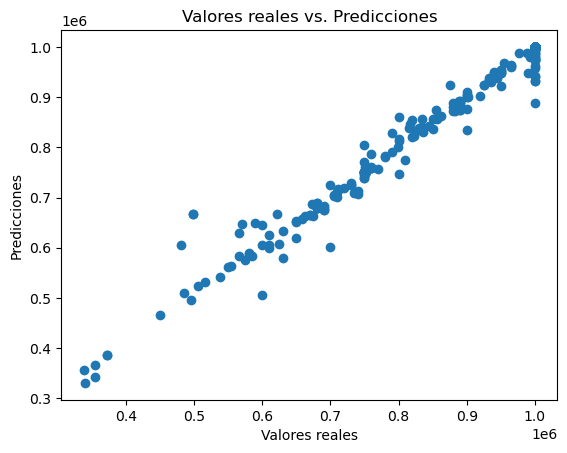

In [126]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

### *Evaluación*

In [127]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
# Calcular el R^2
r2 = r2_score(y_test, y_pred)
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)
print("Error absoluto medio (MAE):", mae)

Error cuadrático medio (MSE): 93969452.90342431
Coeficiente de determinación (R^2): 0.9858347379101637
Error absoluto medio (MAE): 1627.1781005063024


In [149]:
# 1. Selecciona solo las características 'Mes' y 'Año' y la variable objetivo 'precio'
X = df_head_pachuca[['Mes', 'Año']]
y = df_head_pachuca['precio']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrena el modelo solo con 'Mes' y 'Año'
rf_model = rfr(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Prepara los datos para predecir los precios de los meses futuros
meses_futuros = [(10, 2023), (11, 2023), (12, 2023), (1, 2024), (2, 2024), (3, 2024), (4, 2024), (5, 2024), (6, 2024), (7, 2024), (8, 2024), (9, 2024),
                 (10, 2024), (11, 2024), (12, 2024), (1, 2025), (2, 2025), (3, 2025), (4, 2025), (5, 2025), (6, 2025), (7, 2025), (8, 2025), (9, 2025),
                 (10, 2025), (11, 2025), (12, 2025), (1, 2026), (2, 2026), (3, 2026), (4, 2026), (5, 2026), (6, 2026), (7, 2026), (8, 2026), (9, 2026),
                 (10, 2026), (11, 2026), (12, 2026)]

df_futuro = pd.DataFrame(meses_futuros, columns=['Mes', 'Año'])

# Llena los valores de otras características con valores específicos o predeterminados
for columna in df.columns:
    if columna not in ['Mes', 'Año', 'precio']:
        df_futuro[columna] = 0  # Puedes ajustar estos valores según sea necesario

# 5. Realiza las predicciones utilizando solo 'Mes' y 'Año'
predicciones = rf_model.predict(df_futuro[['Mes', 'Año']])

# Agrega las predicciones al DataFrame de los meses futuros
df_futuro['precio_predicho'] = predicciones

# Mostrar el DataFrame con las predicciones
print(df_futuro)

    Mes   Año  categoria  propiedad  m2_total  m2_construido  \
0    10  2023          0          0         0              0   
1    11  2023          0          0         0              0   
2    12  2023          0          0         0              0   
3     1  2024          0          0         0              0   
4     2  2024          0          0         0              0   
5     3  2024          0          0         0              0   
6     4  2024          0          0         0              0   
7     5  2024          0          0         0              0   
8     6  2024          0          0         0              0   
9     7  2024          0          0         0              0   
10    8  2024          0          0         0              0   
11    9  2024          0          0         0              0   
12   10  2024          0          0         0              0   
13   11  2024          0          0         0              0   
14   12  2024          0          0     

In [150]:
df_historico = df_head_pachuca 
df_futuro.rename(columns={'precio_predicho': 'precio'}, inplace=True)
# Concatenar los datos históricos y los datos futuros
df_completo = pd.concat([df_historico[['Mes', 'Año', 'precio']], df_futuro[['Mes', 'Año', 'precio']]], ignore_index=True)
df_completo

,Mes,Año,precio
0,10,2022,575000.000000
1,10,2022,600000.000000
2,10,2022,550000.000000
3,10,2022,751000.000000
4,10,2022,450000.000000
...,...,...,...
9942,8,2026,978934.628776
9943,9,2026,986134.131367
9944,10,2026,978049.264793
9945,11,2026,973125.537742


In [162]:
precio_promedio_por_mes

,Año,Mes,precio
0,2022,10,976931.426700
1,2022,11,974066.081297
2,2023,2,980042.695668
3,2023,3,977402.752492
4,2023,6,986481.685929
5,2023,7,976677.184727
6,2023,9,988147.847648
7,2023,10,978049.264793
8,2023,11,973125.537742
9,2023,12,973125.537742


In [155]:
# Calcular el precio promedio por mes
precio_promedio_por_mes = df_completo.groupby(['Año', 'Mes'])['precio'].mean().reset_index()
# Calcular el precio promedio por año
precio_promedio_por_año = precio_promedio_por_mes.groupby('Año')['precio'].mean().reset_index()
precio_promedio_por_año.rename(columns={'Año': 'año'}, inplace=True)
precio_promedio_por_año.rename(columns={'precio': 'promedio'}, inplace=True)

precio_promedio_por_año

,año,promedio
0,2022,975498.753999
1,2023,979131.563343
2,2024,979399.583612
3,2025,979399.583612
4,2026,979399.583612


In [161]:
# Datos
año = precio_promedio_por_año['año']
promedio = precio_promedio_por_año['promedio']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=año,
    y=promedio,
    mode='markers+lines',
    marker=dict(color='blue'),
))
# Agregar anotaciones para mostrar los valores encima de los puntos
for a, p in zip(año, promedio):
    fig.add_annotation(
        x=a,
        y=p,
        text=f"${p:,.2f}",  # Formatear el valor del promedio como moneda
        showarrow=False,
        font=dict(color='black', size=12),
        xshift=0,
        yshift=17,
        textangle=0
    )
# Actualizar diseño
fig.update_layout(
    title='Plusvalía estimada',
    yaxis=dict(
        range=[0, 1000000],  # Establecer el rango del eje y
        tickvals=[0,1000000, 1000000],  # Definir los valores de las marcas en el eje y
        ticktext=['$0,000,000', '$1,000,000'],  # Definir el texto de las marcas en el eje y
        gridcolor='#dddcda',  # Color de las líneas de la cuadrícula
        gridwidth=1  # Ancho de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='#dddcda', 
        tickmode='array',
        tickvals=año,
        ticktext=año
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
# Exportar gráfica como archivo HTML
def guardar_grafico_como_html(fig, nombre_archivo, carpeta='graficas'):
    # Crear la carpeta si no existe
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    
    # Gráfica como archivo HTML en la carpeta especificada
    pio.write_html(fig, f'{carpeta}/{nombre_archivo}.html')

guardar_grafico_como_html(fig, 'g_scatt_plusvaliaestimada_model_pachuca', carpeta='graficas')
fig.show()
